In [1]:
import numpy as np
import umap
import matplotlib.pyplot as plt

# Load dataset
data = np.load('scBaseEncoderFeat.npy') 
labels = np.load("lineage_info.npy")

print("data shape", data.shape)
print("labels shape", labels.shape)

data shape (21540, 64)
labels shape (21540,)


In [2]:
unique_numbers, frequency = np.unique(labels, return_counts=True)
freq_dict = dict(zip(unique_numbers, frequency))

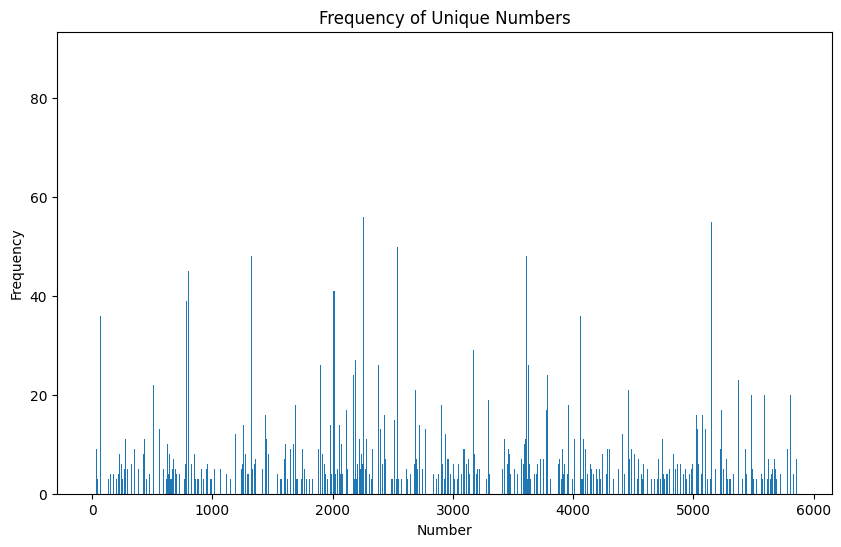

In [3]:
plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the figure
plt.bar(unique_numbers, frequency)
plt.title('Frequency of Unique Numbers')
plt.xlabel('Number')
plt.ylabel('Frequency')

# Optional: if the unique numbers are too many, you might want to consider not showing every unique number on the x-axis to avoid clutter
# plt.xticks([])  # Hides the x-axis labels
plt.show()


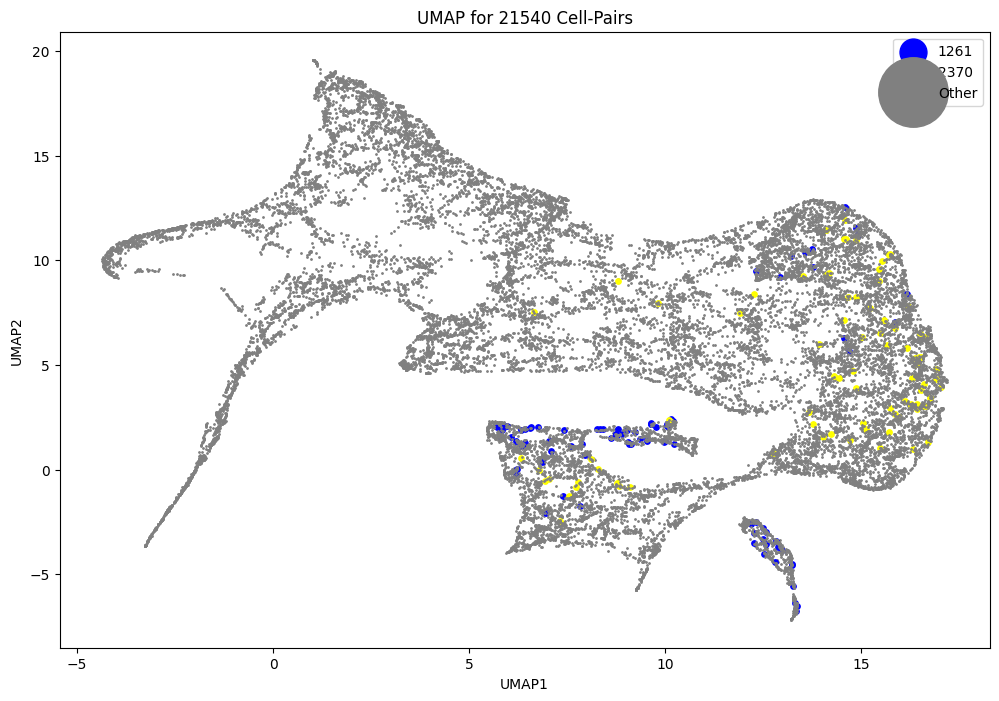

In [4]:
# Find the unique labels and their counts
unique_labels, counts = np.unique(labels, return_counts=True)
# Get the top 5 labels
# top_labels = unique_labels[np.argsort(-counts)[:5]]
top_labels = unique_labels[np.argsort(-counts)[:2]]

# Map labels to colors, with a default gray color
# label_to_color = {label: color for label, color in zip(top_labels, ['blue', 'orange', 'green', 'red', 'purple'])}
label_to_color = {label: color for label, color in zip(top_labels, ['blue', 'yellow'])}
default_color = 'gray'

# Create a color list for the scatter plot
colors = [label_to_color.get(label, default_color) for label in labels]

# Initialize UMAP and fit your data
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# Plotting
plt.figure(figsize=(12, 8))
for label in np.unique(labels):
    subset = embedding[labels == label]
    if label in top_labels:
        plt.scatter(subset[:, 0], subset[:, 1], s=15, color=label_to_color[label], label=label)
    else:
        plt.scatter(subset[:, 0], subset[:, 1], s=1, color=default_color)

plt.title('UMAP for 21540 Cell-Pairs')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Create a legend for the top labels and an entry for 'Other'
handles, labels = plt.gca().get_legend_handles_labels()
# Add a dummy handle for 'Other' labels
handles.append(plt.Line2D([], [], marker='o', color='gray', linestyle='None', markersize=10))
labels.append('Other')
plt.legend(handles, labels, markerscale=5)

# plt.savefig('/home/users/syang71/kzlinlab/projects/lineageBarcodingCL/git/scContrastiveLearn_Joshua/umap_plot.png', dpi=300) 
# plt.savefig('/home/users/syang71/kzlinlab/projects/lineageBarcodingCL/git/scContrastiveLearn_Joshua/umap_plot.svg', format='svg')
plt.show()
